## Data Visualization

Data visualization is a graphical representation of information of data. By using visual elements like charts and graphs, Data visualization libraries provide an accessible way to see and understand trends, outliers, and patterns in data.

### What is Seaborn
Seaborn is a Python data visualization library built on top of matplotlib. It provides a high-level interface for ploting attractive and informative statistical graphics.

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline          # the matplotlib inline plots will appear directly below the cell in which the plot function was called.

UsageError: unrecognized arguments: # the matplotlib inline plots will appear directly below the cell in which the plot function was called.


### Now will load the dataset that are readily avaliable in the seaborn library

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Now will load the dataset online using seaborn library

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

## Uni-Variate Analysis

Univariate analysis is the study of a single variable, without considering any relationship with other variables. It is a fundamental method in exploratory data analysis to understand the distribution, central tendency, dispersion, and other descriptive statistics of a variable.

### Dist Plot
A distplot in matplotlib is useful for visualizing the distribution of a univariate dataset by showing a histogram and a kernel density estimate (KDE) curve. It is commonly used to identify the shape of the distribution, potential outliers, and skewness in the data.

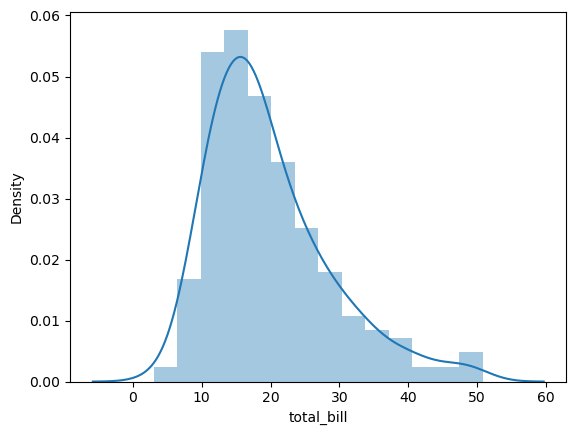

In [ ]:
sns.distplot(tips.total_bill)
plt.show()

### Ploting Histogram

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

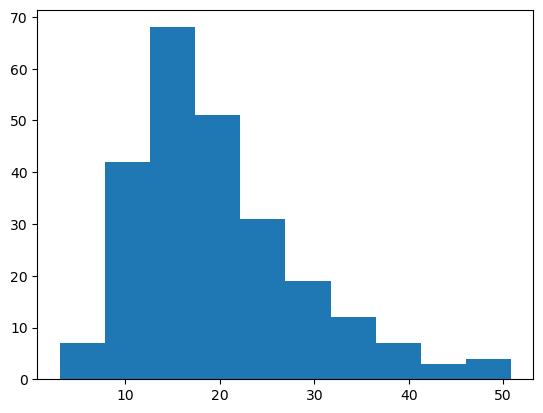

In [ ]:
plt.hist(tips.total_bill,bins = 10)

In [ ]:
tips.total_bill.sort_values(ignore_index=True)

0       3.07
1       5.75
2       7.25
3       7.25
4       7.51
       ...  
239    45.35
240    48.17
241    48.27
242    48.33
243    50.81
Name: total_bill, Length: 244, dtype: float64

#### 5 number summary
The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

In [ ]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

![Box-Plot-and-Whisker-Plot-2.png](attachment:Box-Plot-and-Whisker-Plot-2.png)

<Axes: xlabel='total_bill'>

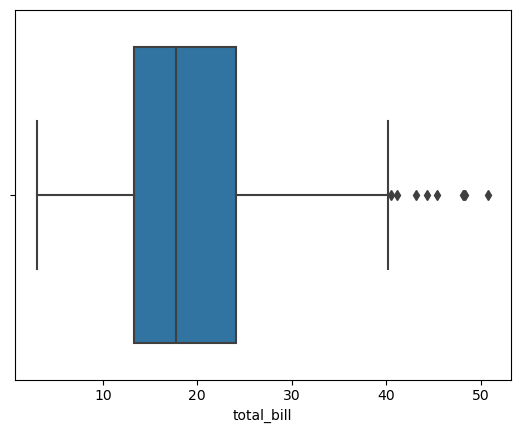

In [ ]:
sns.boxplot(x= tips.total_bill)

### Heat map

heatmap is used for visualizing the correlation between variables in a dataset by displaying a color-coded matrix. It is commonly used to identify patterns or relationships between variables, especially in large datasets.

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.shape

(891, 15)

<Axes: >

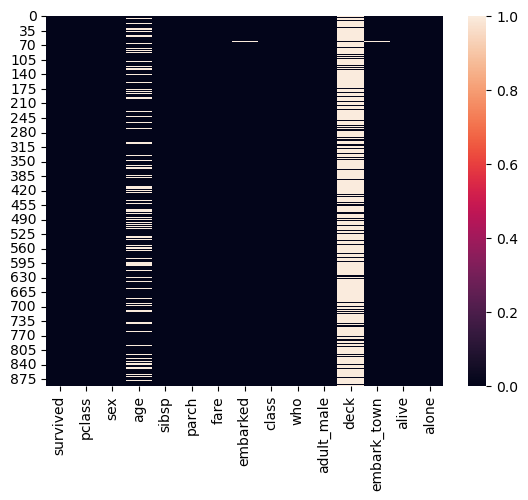

In [ ]:
sns.heatmap(titanic.isnull())

<Axes: >

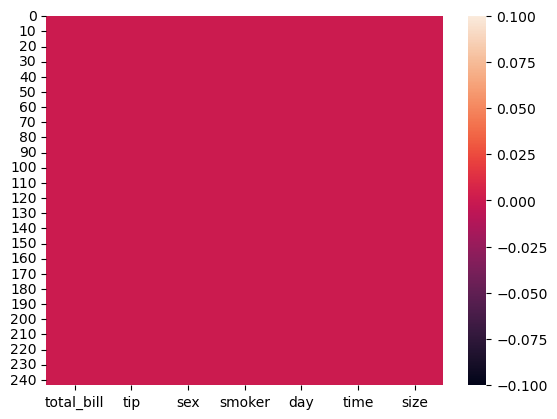

In [ ]:
sns.heatmap(tips.isnull())

In [ ]:
tips[tips.describe().columns.to_list()].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

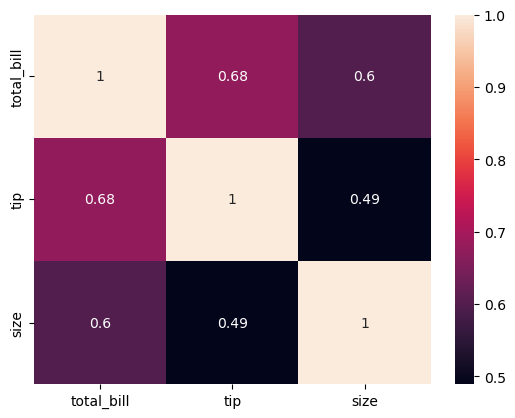

In [ ]:
sns.heatmap(tips[tips.describe().columns.to_list()].corr(),annot = True)

### Bi-variate Analysis (Scatter plot)

A scatter plot is a graphical representation of two numerical variables in a dataset, where each point represents an observation. It is useful for visualizing the relationship between two variables, identifying patterns or trends, and detecting outliers or clusters in the data.

<Axes: xlabel='total_bill', ylabel='tip'>

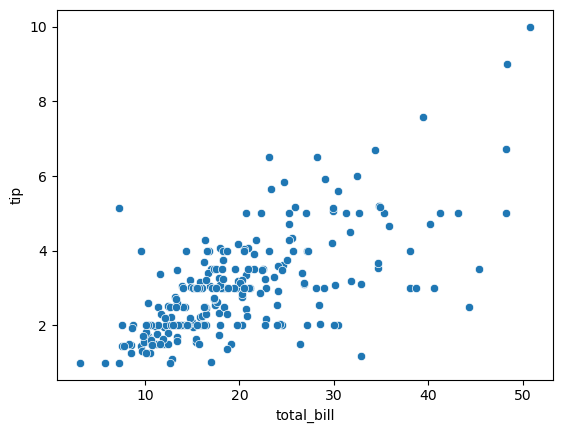

In [ ]:
# Now will see how the total_bill and tip are correlated eachother

sns.scatterplot(x='total_bill',y = 'tip',data = tips)

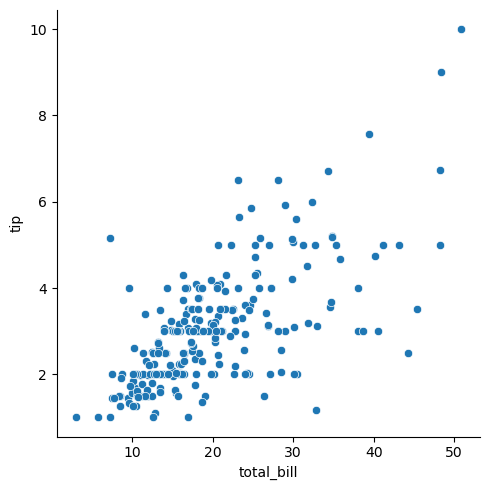

In [ ]:
# Now will see how the total_bill and tip are correlated eachother
                                                            # By default relational plot uses scatter plot
sns.relplot(x='total_bill',y='tip',data = tips)             # FacetGrid is nothing but you can plot many figure in a single plot

You can see if the total bill increases then tip is also increasing there is a Positive Linear Relationship

In [ ]:
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [ ]:
np.corrcoef(tips.total_bill,tips.tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

You can see it is 68% Positively correlated

![image.png](attachment:image.png)

### Multivariate Analysis (Scatter plot with hue)

Multivariate analysis is a statistical method that involves analyzing data with multiple variables or factors to identify patterns, relationships, and dependencies between them. It is used to explore complex relationships and to identify variables that have the greatest impact on the outcome.

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

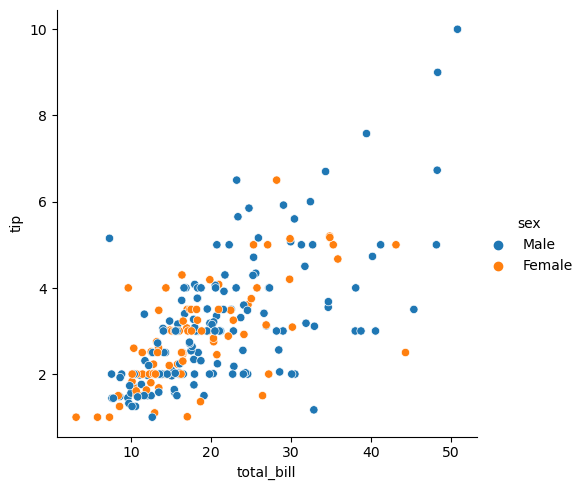

In [ ]:
sns.relplot(x='total_bill',y='tip',data=tips,hue='sex')

The figure tells you that Male has given highest tip and made high total bill compared to female and we can observe that the male customers are bit high compared to female

In [ ]:
tips.groupby('sex')[['tip','total_bill']].describe()

tip                                                 total_bill  \
        count      mean       std  min  25%   50%   75%   max      count   
sex                                                                        
Male    157.0  3.089618  1.489102  1.0  2.0  3.00  3.76  10.0      157.0   
Female   87.0  2.833448  1.159495  1.0  2.0  2.75  3.50   6.5       87.0   

                                                               
             mean       std   min    25%    50%    75%    max  
sex                                                            
Male    20.744076  9.246469  7.25  14.00  18.35  24.71  50.81  
Female  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30

#### Now will try to compare with total bill and tips based on Sex and smoker

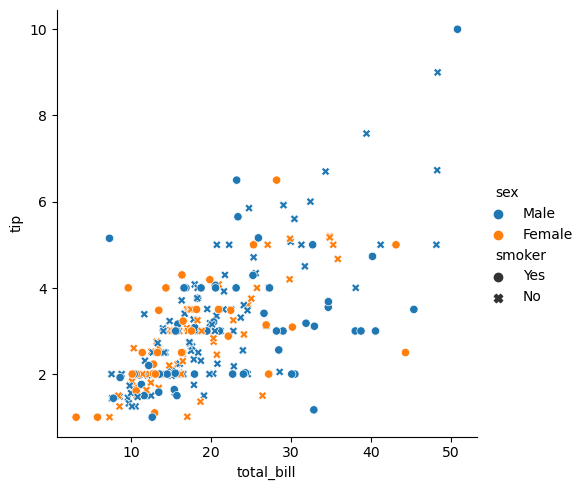

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='sex',style='smoker',data=tips)

Figure tells that higest and more tips are given by male customers and also smoke comparatively female non smokers

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
tips.sex.value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

In [ ]:
tips.groupby(['smoker','sex'])[['total_bill','tip']].describe()

total_bill                                                      \
                   count       mean       std   min      25%    50%      75%   
smoker sex                                                                     
Yes    Male         60.0  22.284500  9.911845  7.25  15.2725  20.39  28.5725   
       Female       33.0  17.977879  9.189751  3.07  12.7600  16.27  22.1200   
No     Male         97.0  19.791237  8.726566  7.51  13.8100  18.24  22.8200   
       Female       54.0  18.105185  7.286455  7.25  12.6500  16.69  20.8625   

                       tip                                                     
                 max count      mean       std   min  25%   50%     75%   max  
smoker sex                                                                     
Yes    Male    50.81  60.0  3.051167  1.500120  1.00  2.0  3.00  3.8200  10.0  
       Female  44.30  33.0  2.931515  1.219916  1.00  2.0  2.88  3.5000   6.5  
No     Male    48.33  97.0  3.113402  1.489559  1.25  2.0  2.74  3.7100   9.0  
       Female  35.83  54.0  2.773519  1.128425  1.00  2.0  2.68  3.4375   5.2

In [ ]:
tips.groupby('smoker')['total_bill'].agg(['sum','mean','count','min','max'])

,sum,mean,count,min,max
smoker,,,,,
Yes,1930.34,20.756344,93,3.07,50.81
No,2897.43,19.188278,151,7.25,48.33


#### Now will try to compare with total bill and tip with based on time

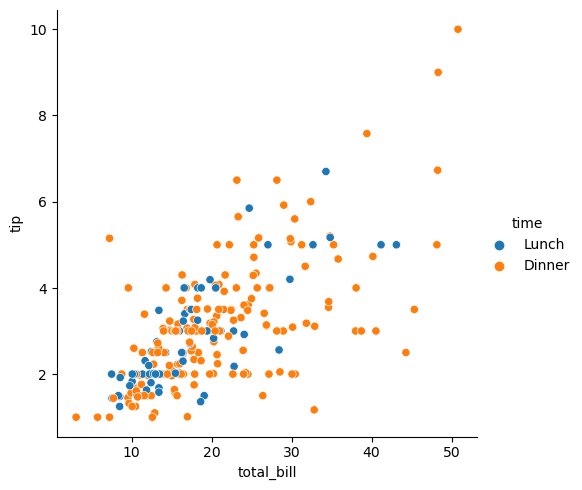

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='time',data=tips)
plt.show()

Figure shows that most of the tips and highest bill are given during dinner time compared to Lunch time

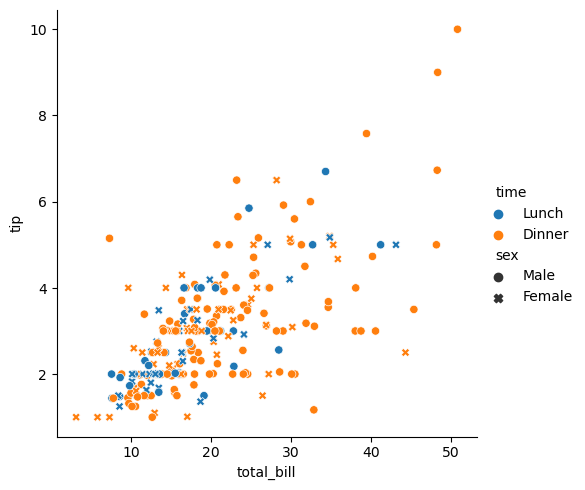

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='time',style='sex',data=tips)
plt.show()

The Male customer contributing the highest tip and generating the largest total bill among diverse customers during dinner time

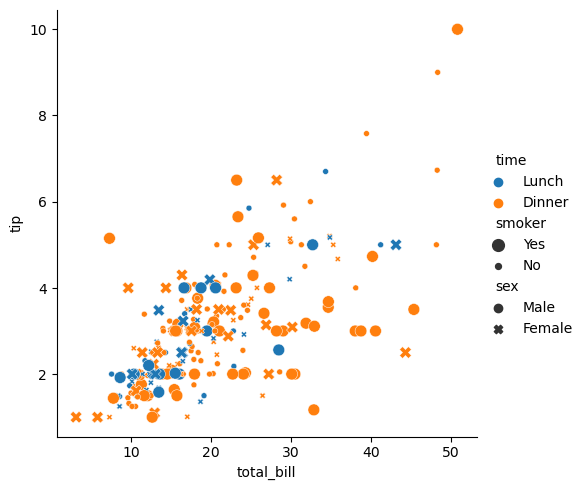

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='time',style='sex',size='smoker',data=tips)
plt.show()

Figure shows that during dinner, male smokers not only provided the highest tips but also generated the most substantial total bill compared to other.

In [ ]:
tips.groupby(['time','smoker','sex'])[['tip','total_bill']].describe()

tip                                                   \
                     count      mean       std   min     25%    50%     75%   
time   smoker sex                                                             
Lunch  Yes    Male    13.0  2.790769  1.095738  1.58  2.0000  2.200  4.0000   
              Female  10.0  2.891000  1.057286  2.00  2.0025  2.500  3.4175   
       No     Male    20.0  2.941500  1.485623  1.44  2.0000  2.405  3.5500   
              Female  25.0  2.459600  1.078369  1.25  1.6800  2.000  2.9200   
Dinner Yes    Male    47.0  3.123191  1.596451  1.00  2.0000  3.000  3.7200   
              Female  23.0  2.949130  1.306243  1.00  2.1150  3.000  3.5000   
       No     Male    77.0  3.158052  1.497034  1.25  2.0000  3.000  3.7100   
              Female  29.0  3.044138  1.117885  1.00  2.4500  3.000  3.6100   

                            total_bill                                       \
                        max      count       mean        std    min     25%   
time   smoker sex                                                             
Lunch  Yes    Male     5.00       13.0  17.374615   6.852075   8.58  13.420   
              Female   5.00       10.0  17.431000   9.426066  10.09  13.000   
       No     Male     6.70       20.0  18.486500   8.739134   7.51  12.695   
              Female   5.17       25.0  15.902400   6.759447   8.35  11.380   
Dinner Yes    Male    10.00       47.0  23.642553  10.250081   7.25  15.610   
              Female   6.50       23.0  18.215652   9.289537   3.07  12.055   
       No     Male     9.00       77.0  20.130130   8.748472   8.77  13.940   
              Female   5.20       29.0  20.004138   7.298371   7.25  15.770   

                                              
                         50%      75%    max  
time   smoker sex                             
Lunch  Yes    Male    16.000  19.4400  32.68  
              Female  14.845  16.4525  43.11  
       No     Male    16.975  22.7750  41.19  
              Female  13.420  18.2600  34.83  
Dinner Yes    Male    23.100  30.2600  50.81  
              Female  16.320  23.8500  44.30  
       No     Male    18.290  23.6800  48.33  
              Female  17.310  24.5900  35.83

### Now will automate the process

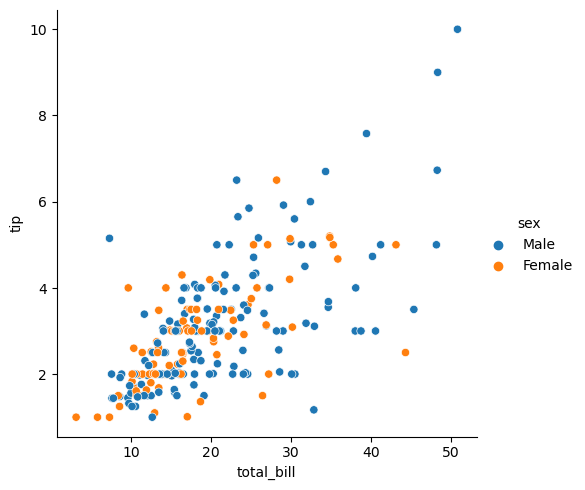

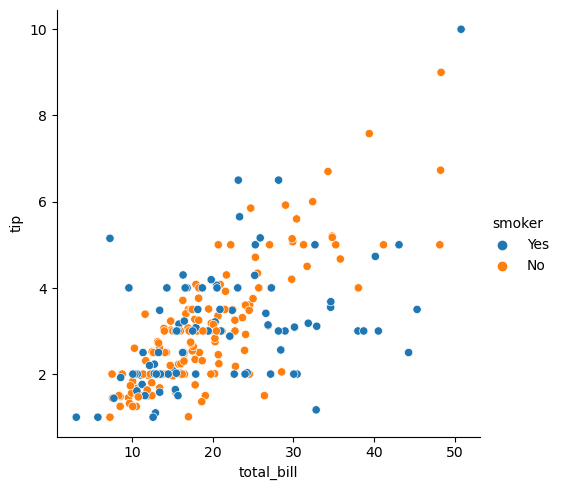

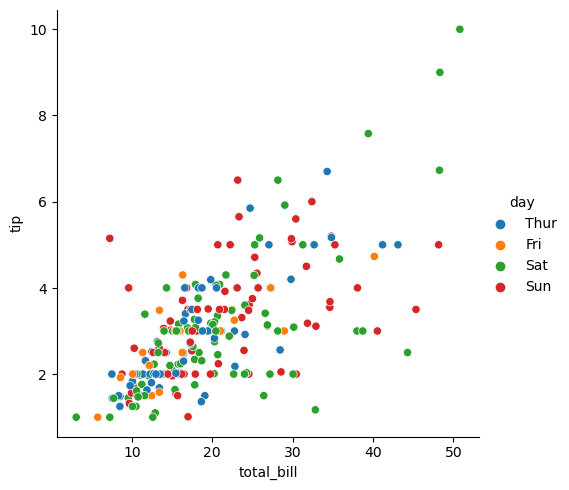

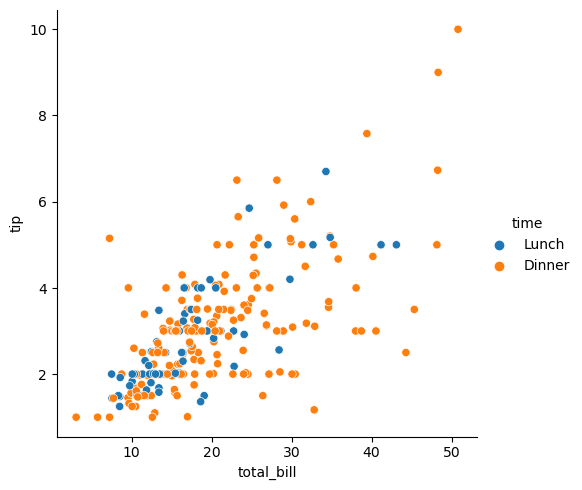

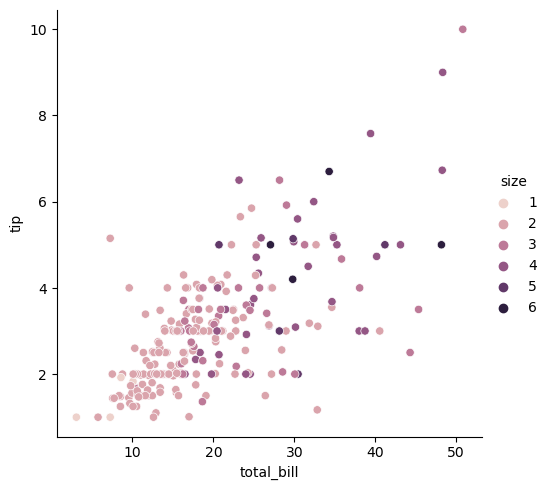

In [ ]:
cat_col = ['sex','smoker','day','time','size']
for i in cat_col:
sns.relplot(x='total_bill',y='tip',hue=i,data=tips)

### Now will Print subplot

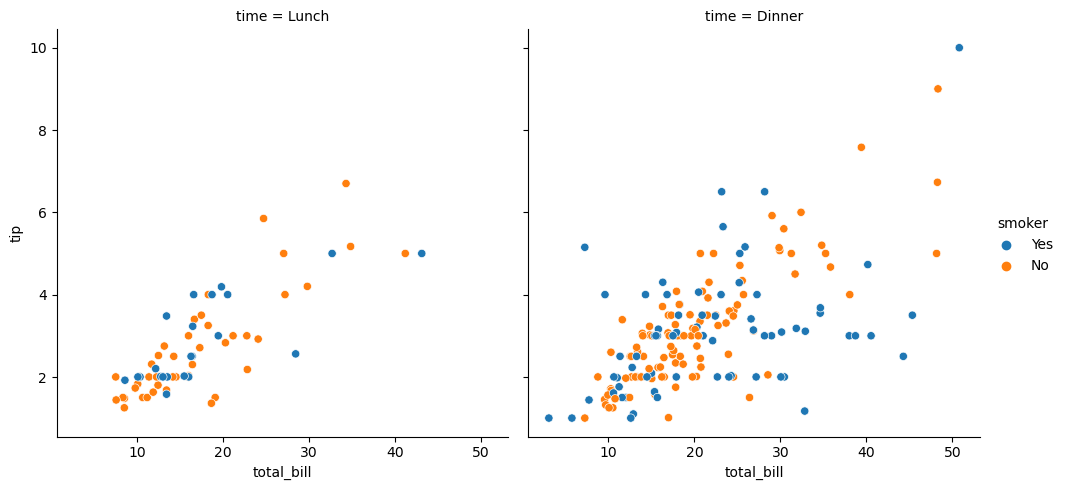

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',col='time',data=tips)    # If you print col then it prints column wise
plt.show()

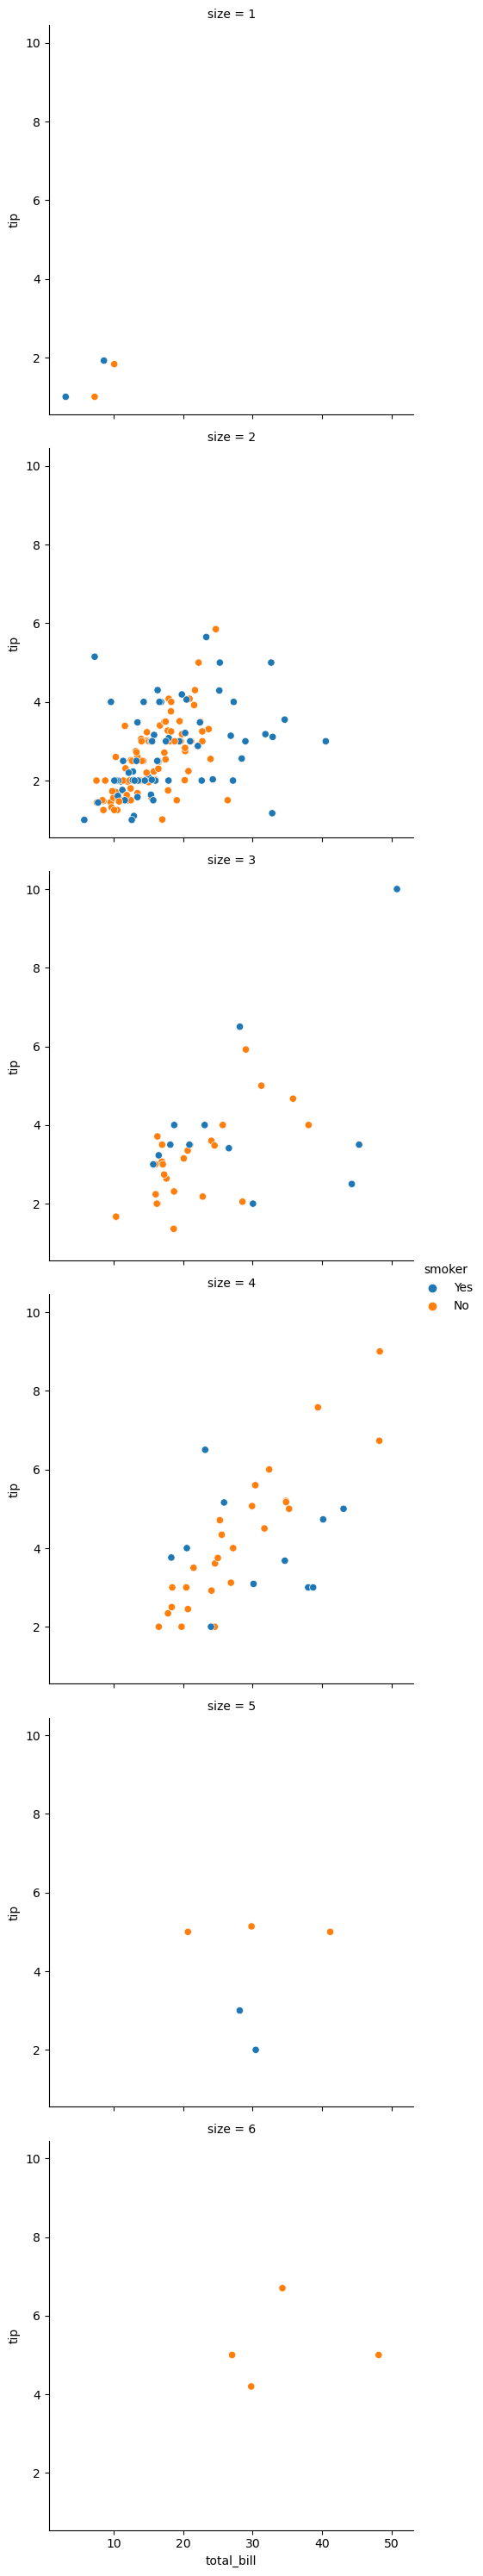

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',row='size',data=tips)    # If you print col then it prints column wise
plt.show()

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


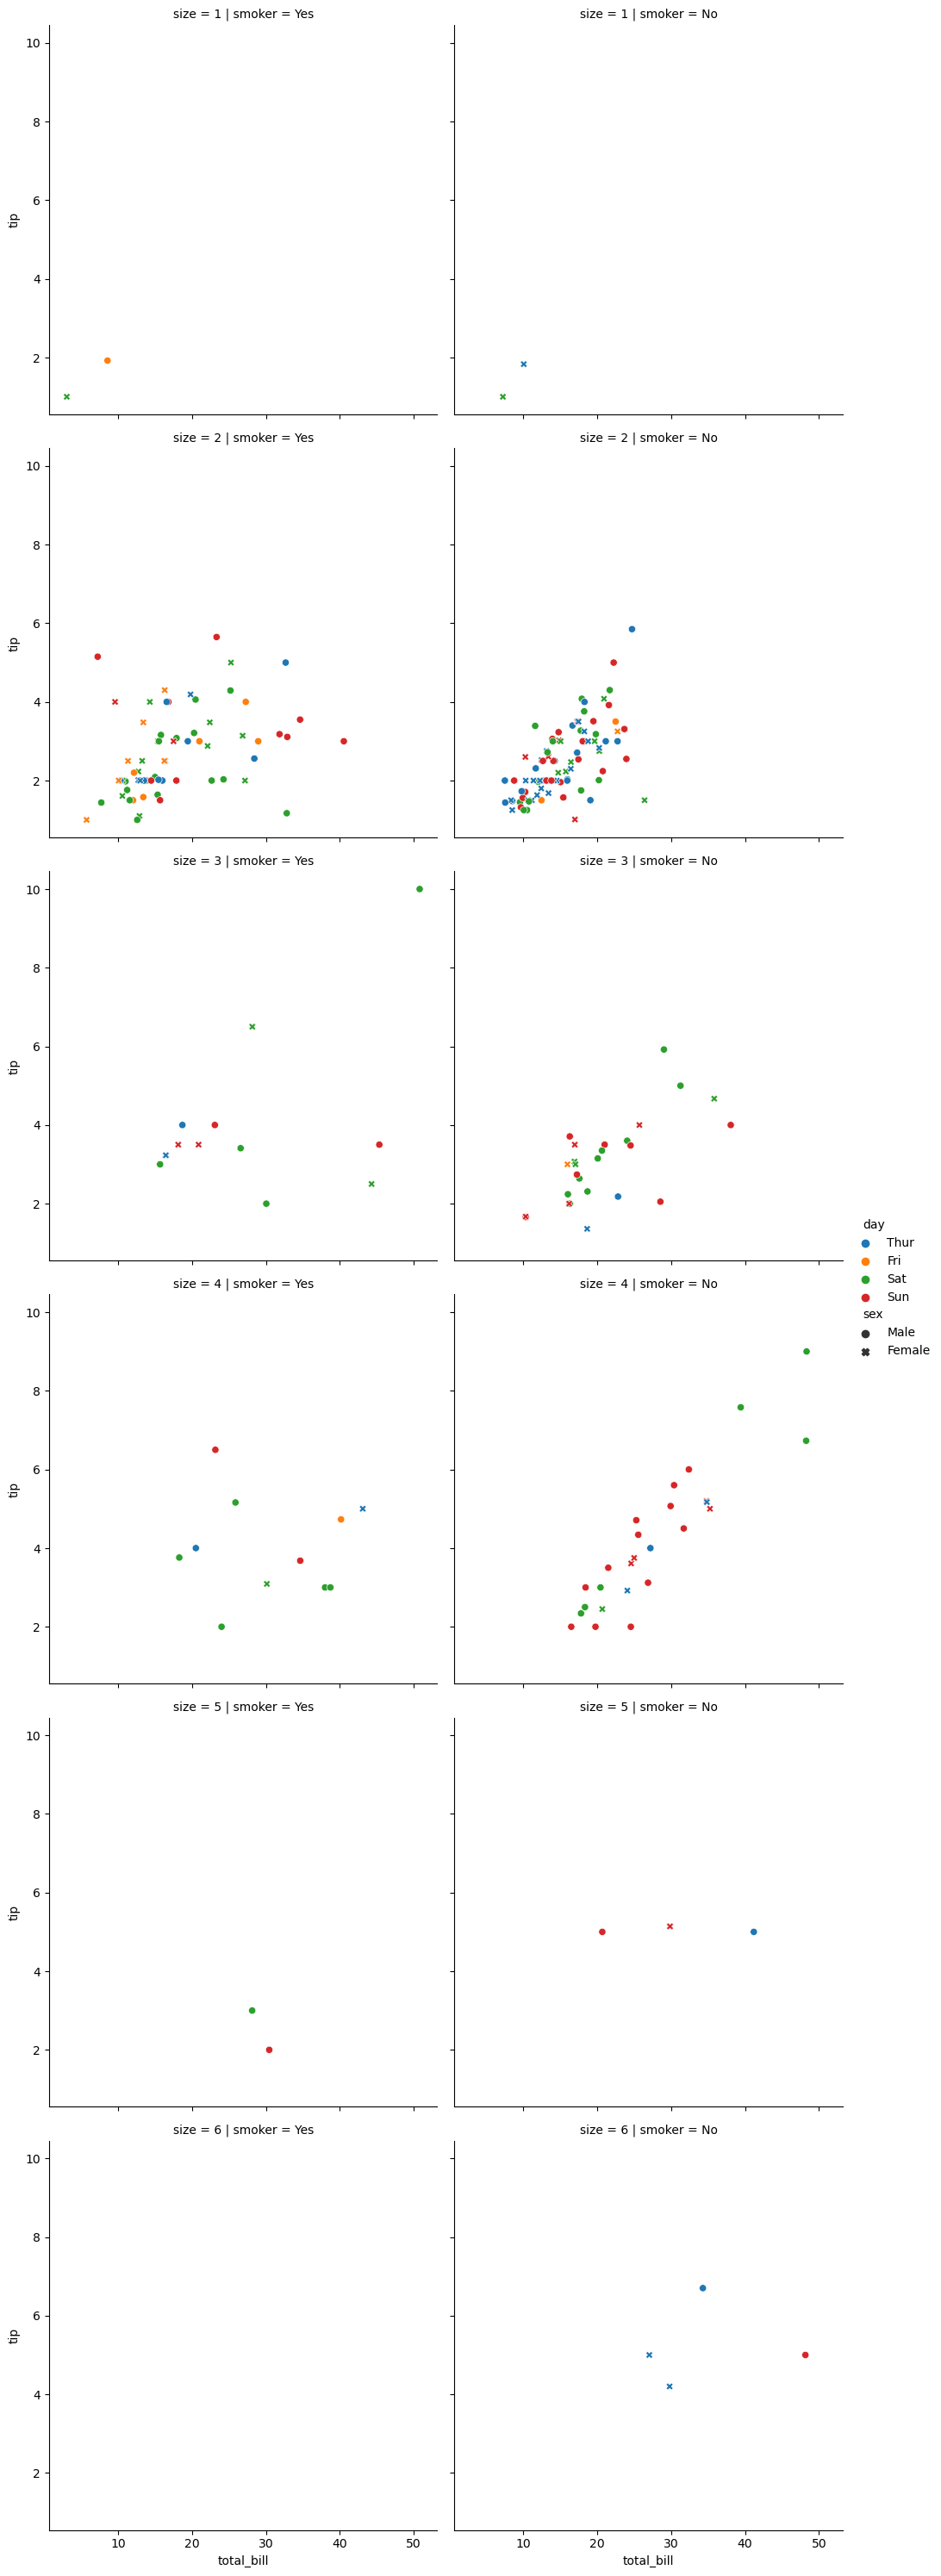

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='day',row='size',col='smoker',style='sex',data=tips)

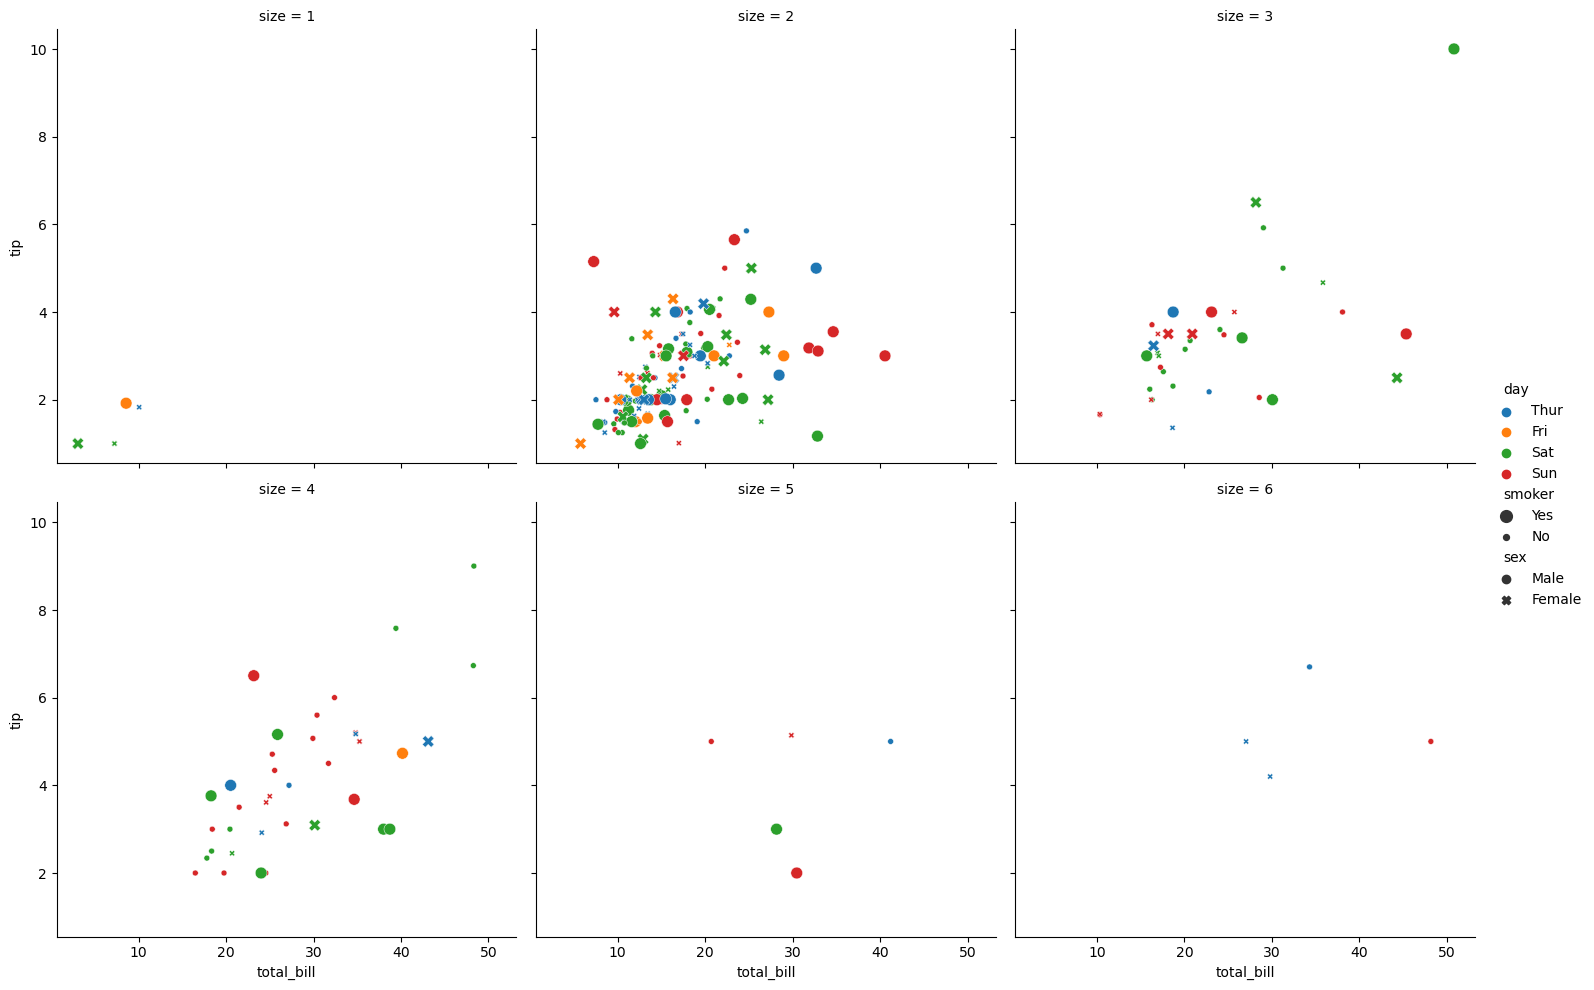

In [ ]:
# Or you can use col_wrap to wrap the column

sns.relplot(x='total_bill',y='tip',hue='day',col='size',style='sex',data=tips,size='smoker',col_wrap =3)

### Now we have used scatter plot and got to know how to use it, Will try to understand how to work on Line plot

### Line Plot:
Line Graph is commonly used to show trends or changes in data over time

In [ ]:
Date = np.random.randint(1,31,size=350)
price = np.random.randint(2000,4500,size=350)

In [ ]:
df = pd.DataFrame({'Date':Date,'Price':price})
df.head()

,Date,Price
0,14,3801
1,15,3644
2,15,4112
3,3,3164
4,9,3030


In [ ]:
df.shape

(350, 2)

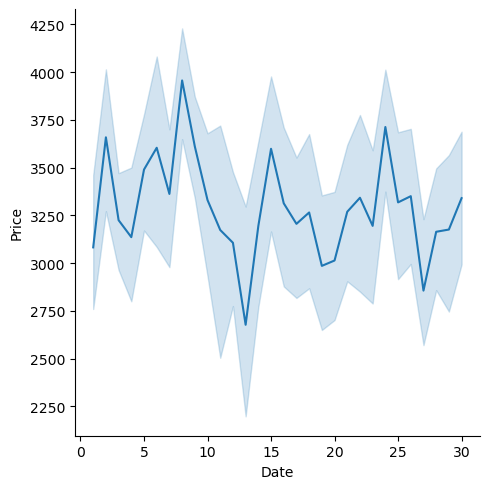

In [ ]:
sns.relplot(x='Date',y='Price',data=df,kind='line')

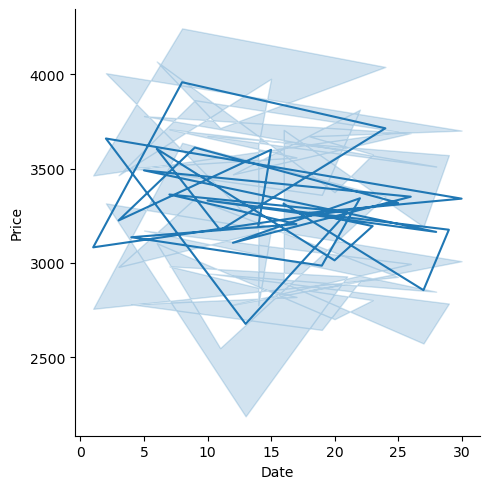

In [ ]:
# By default the x and y axis will be sorted for line plot (if you want to turn off the sorting)
sns.relplot(x='Date',y='Price',data=df,kind='line',sort=False)

### If the Data is not sorted it doesn't get the proper information so by default seaborn will sort the data

### For better understanding of line plot we require timestamp on my x-axis so we can find the trend over a period

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# Now will load fmri dataset using seaborn

fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


### Functional magnetic resonance imaging or functional MRI (fMRI) measures brain activity by detecting changes associated with blood flow.

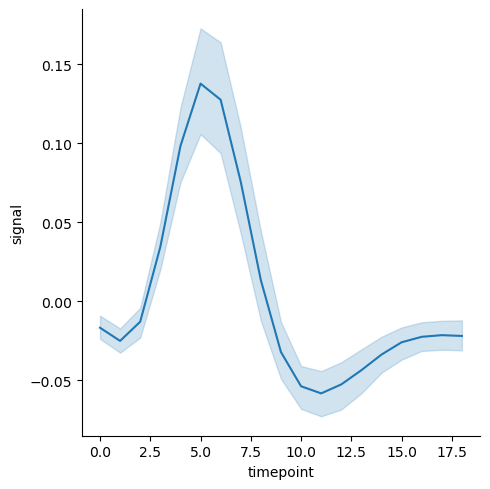

In [ ]:
# Now will perfrom Normal line plot
sns.relplot(x='timepoint',y='signal',kind='line',data=fmri)

### You can see we have line along with shadow (its because of 95% of confidence interval) That states that it is 95% confident that the line will fall on that region (we can also state that this is correlated with standard deviation, this the expected deviation from the mean of the data)

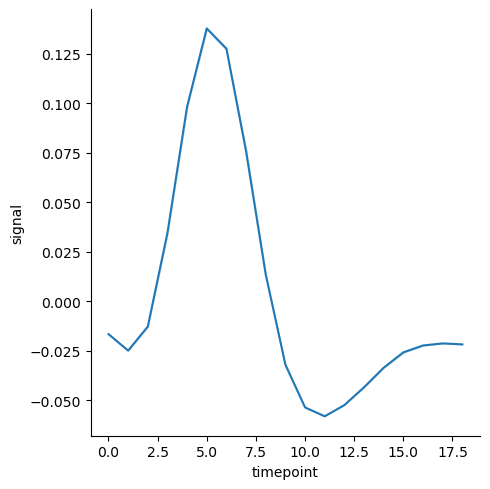

In [ ]:
# Now will trun off the confidence interval

sns.relplot(x='timepoint',y='signal',kind='line',data=fmri,ci=False)

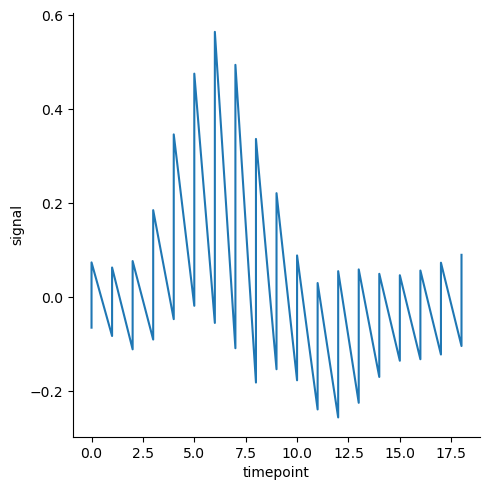

In [ ]:
# Now will plot the real data by turning off the confident interval and estimator analysis

sns.relplot(x='timepoint',y='signal',estimator=None,kind='line',data=fmri,ci=False)

### Now you can see the data looks some what weird (we cannot gather much information)

#### hue = You can change the color based on different category
#### size = You can change the size based on the different category
#### style = You can change the style of plot based on the different category

In [ ]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


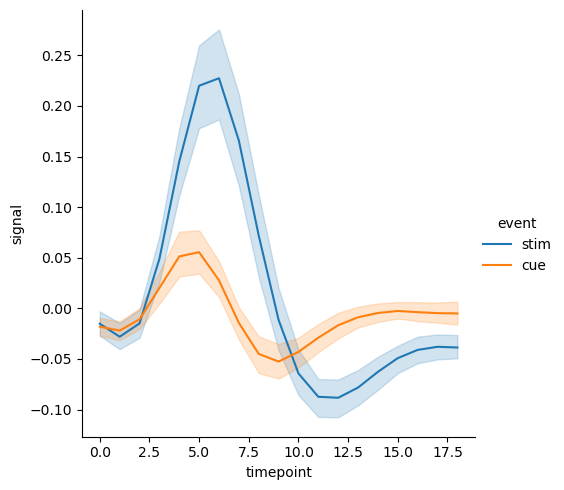

In [ ]:
sns.relplot(x='timepoint',y='signal',hue='event',kind='line',data=fmri)

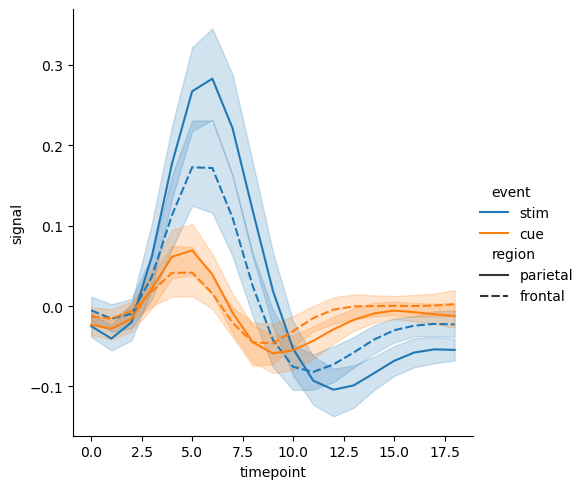

In [ ]:
sns.relplot(x='timepoint',y='signal',hue='event',style='region',kind='line',data=fmri)

### Will provide the Markers to get better understanding of the plot

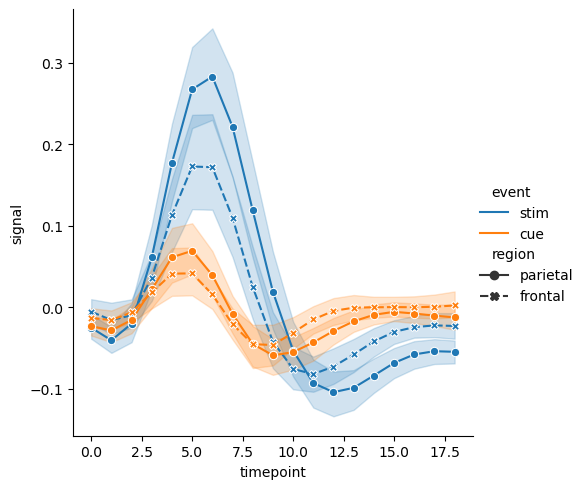

In [ ]:
sns.relplot(x='timepoint',y='signal',hue='event',style='region',kind='line',markers=True,data=fmri)

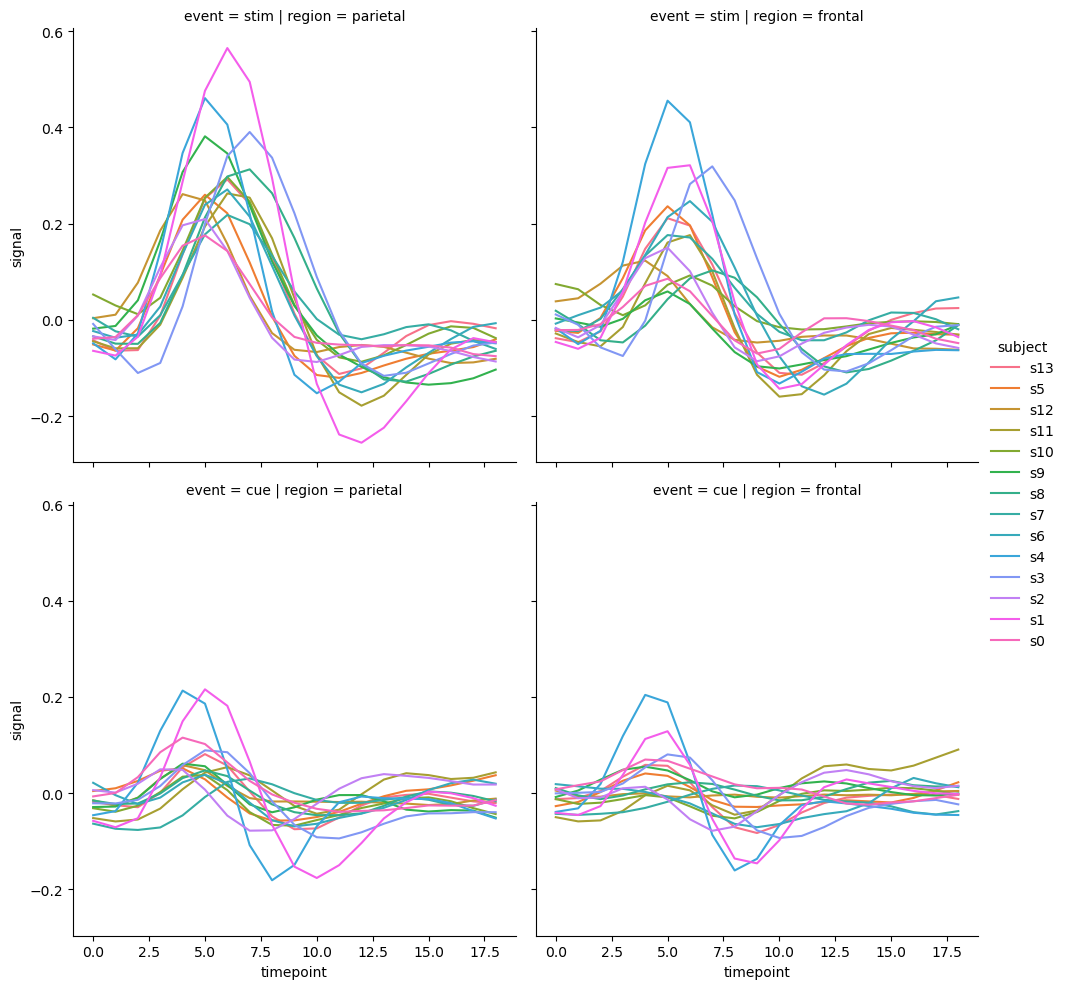

In [ ]:
sns.relplot(x='timepoint',y='signal',hue='subject',kind='line',ci=False,col='region',row='event',data=fmri)

## 2. Categorical Data Ploting

- catplot()
- boxplot()
- stripplot()
- swarmplot()


### Catplot
catplot :- The default representation of catplot is a scatter plot for 1 numerical and one or more categorical variable
    
This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


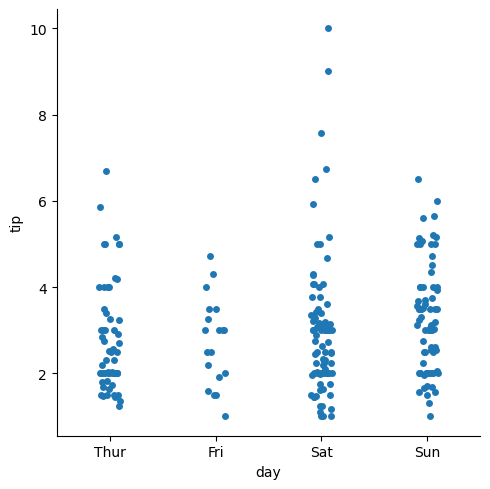

In [ ]:
sns.catplot(x='day',y='tip',data=tips)      # x=categorical variable,y=numerical variable

### If i want to remove the deviation from the mean we can give an arrgument as jitter = False

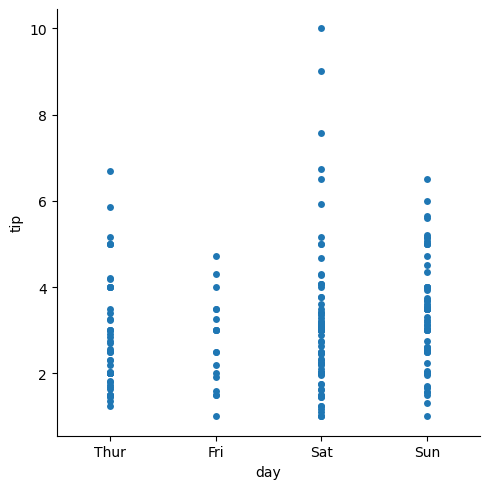

In [ ]:
sns.catplot(x='day',y='tip',jitter=False,data=tips)    # If you remove the jitter it stops the over lapping in the data

### Swarm Plot
Swarm Plot in Seaborn is used to draw a categorical scatterplot with non-overlapping points

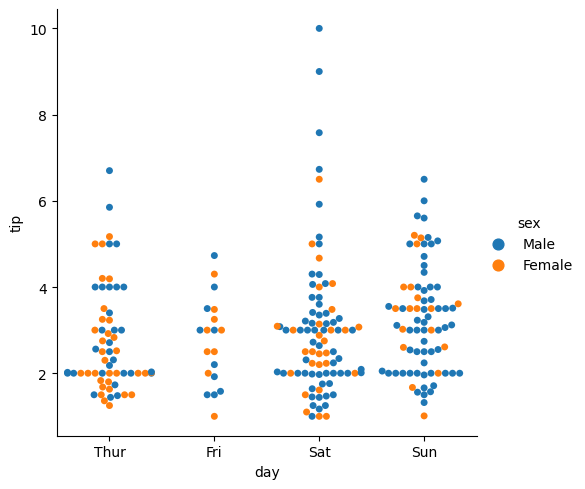

In [ ]:
sns.catplot(x='day',y='tip',kind='swarm',hue='sex',data=tips)

### Boxplot
Box plot show distributions with respect to categories. with different statistical information like min,max,and different quartiles

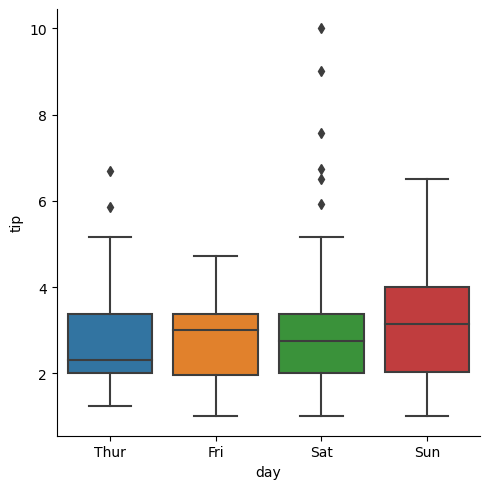

In [ ]:
sns.catplot(x='day',y='tip',data=tips,kind='box')

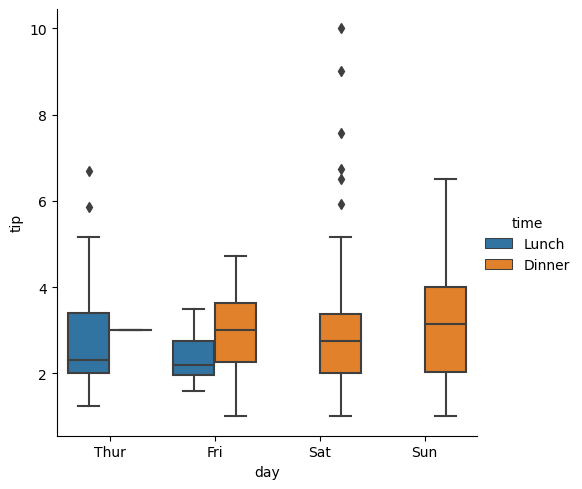

In [ ]:
sns.catplot(x='day',y='tip',kind = 'box',hue='time',data=tips)

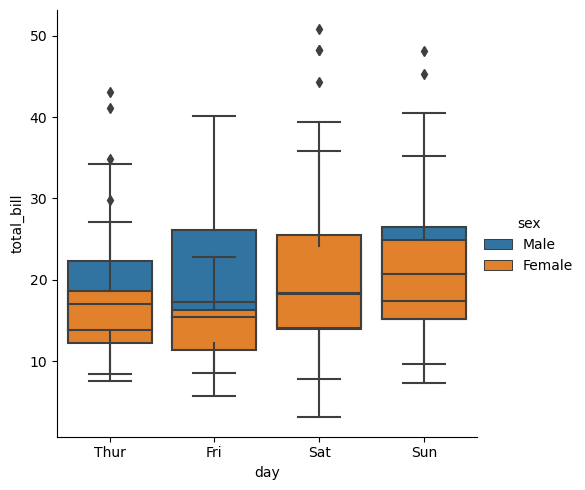

In [ ]:
sns.catplot(x='day',y='total_bill',hue='sex',data=tips,kind='box',dodge=False)  # If you print dodge = False it plots in the same axis

### Violin Plot

#### A violin plot is a combination of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable

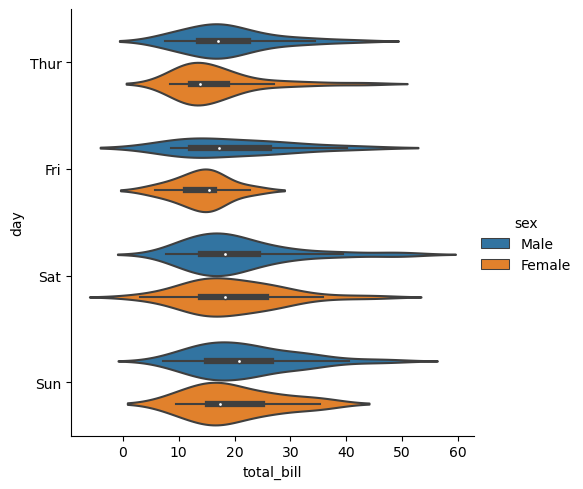

In [ ]:
sns.catplot(x='total_bill',y='day',hue='sex',data=tips,kind='violin')

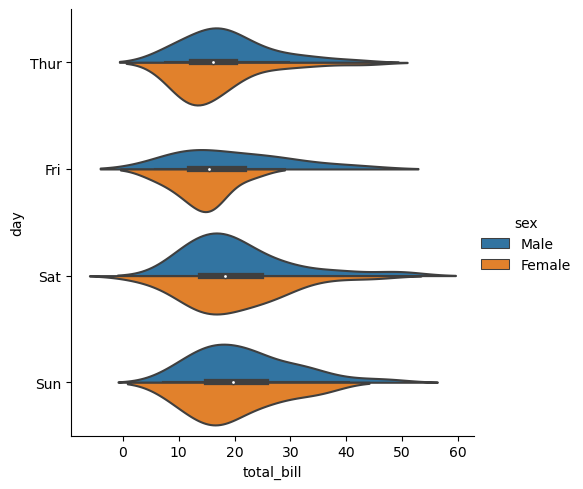

In [ ]:
sns.catplot(x='total_bill',y='day',hue='sex',data=tips,kind='violin',split=True)

### Will Load Titanic Dataset

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Will perform categorical feature with another categorical feature


<Axes: xlabel='sex', ylabel='count'>

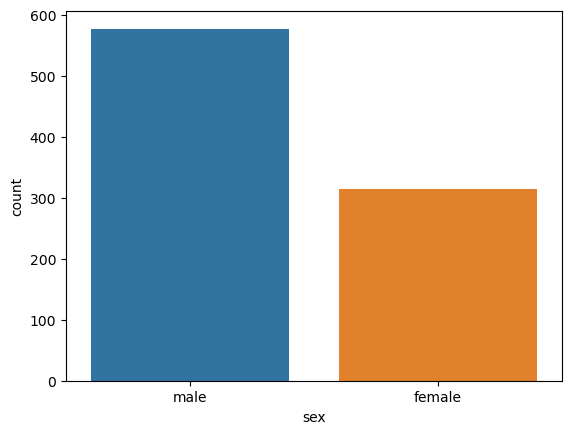

In [ ]:
sns.countplot(x='sex',data=titanic)

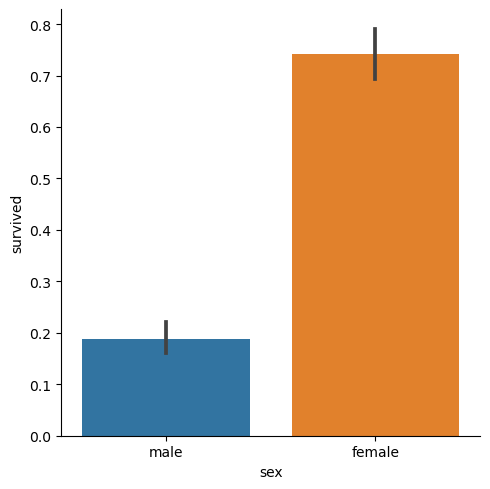

In [ ]:
sns.catplot(x='sex',y='survived',data=titanic,kind='bar')

In [ ]:
titanic.groupby('sex')['survived'].value_counts(normalize=True)*100

sex     survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: survived, dtype: float64

### By the above graph you can state that 74% of female are survived and 18% of male are survived

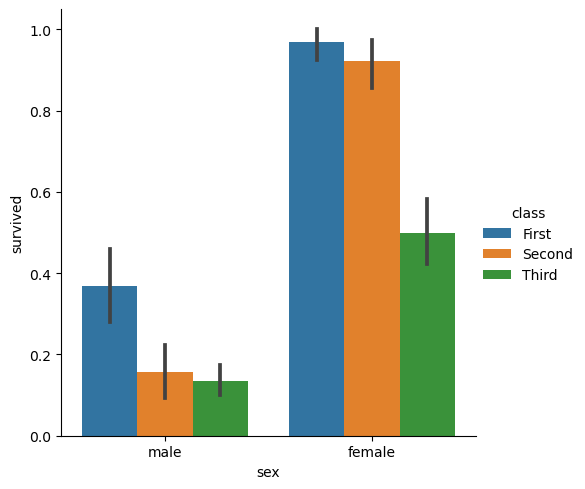

In [ ]:
sns.catplot(x='sex',y='survived',hue='class',kind='bar',data=titanic)    # The line represents the 95% of confident interval it may range between the values

By seeing above graph you can state that 96.8% of female Passenger who are in first class were survived and on the second class 92% of female Passenger were survived and 50% of female Passenger were in third class were survived ,  36% of Male Passenger were survived who are in first class, 15% of Male Passenger were survived who are in second class, and 13% of Male Passenger were survived who were in Third class

By seeing above statement you can state that the female passenger with firstclass ticket is almost survived and if the ticket is high class then there is higher probability to survive and the survival rate of female is higher than male

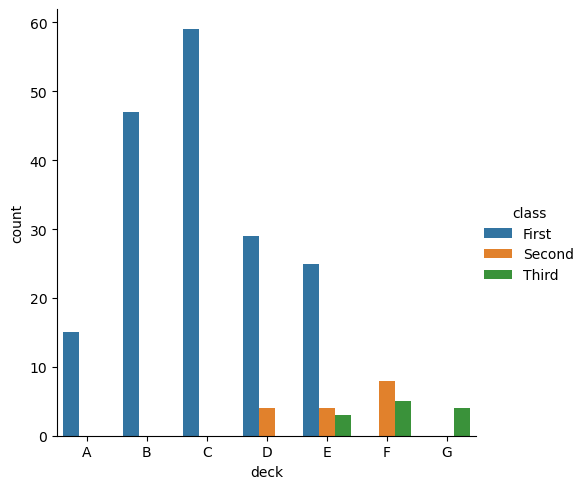

In [ ]:
sns.catplot(x='deck',kind='count',data=titanic,hue='class')

#### You can see that the Deck A,B,C is belonging for First class (you can state that who all are travelling in deck A,B,C there is higher probability rate of survival)

### Now will perform Point plot

Pointplot is used to display point estimates and confidence intervals of categorical variables. It is useful for comparing different categories of data and identifying trends or differences between them.

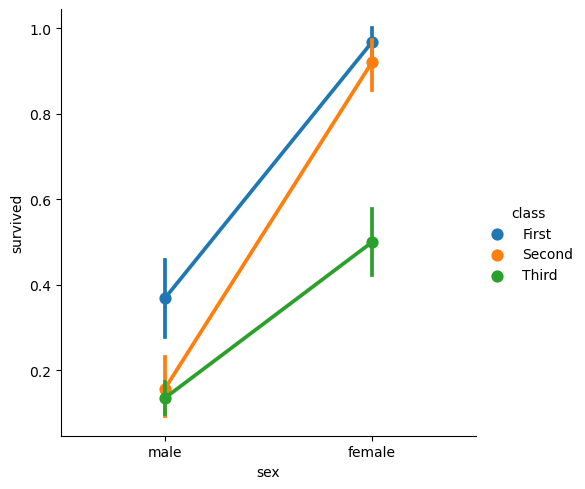

In [ ]:
sns.catplot(x='sex',y='survived',kind='point',hue='class',data=titanic)

### By seeing above graph you can state that there is a higher chances of survival rate for female Passenger compared to Male Passenger

### Joint plot

Jointplot in seaborn is used to visualize the relationship between two variables by plotting their joint distribution and marginal distributions. It helps in understanding the correlation and distribution of variables in a dataset.

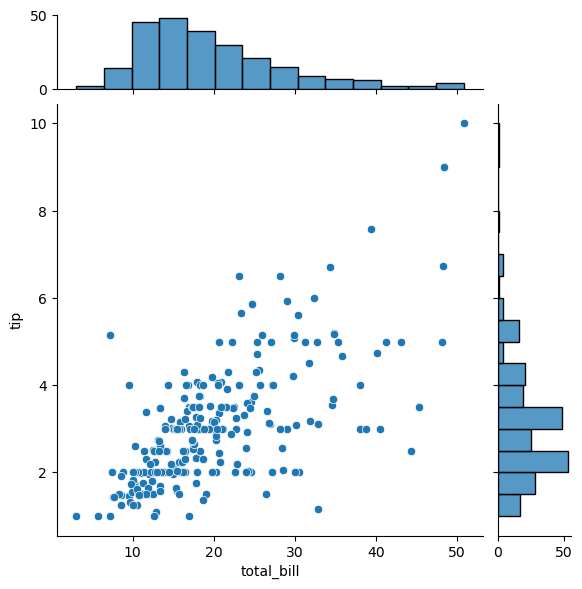

In [ ]:
# If you want to perform both scatter plot and distribution then you want to use joint plot
sns.jointplot(x='total_bill',y='tip',data=tips,marginal_ticks =True)

### Pairplot

### Pairplot plots histogram plot at the diagonal element and scatterplot at non diagonal element

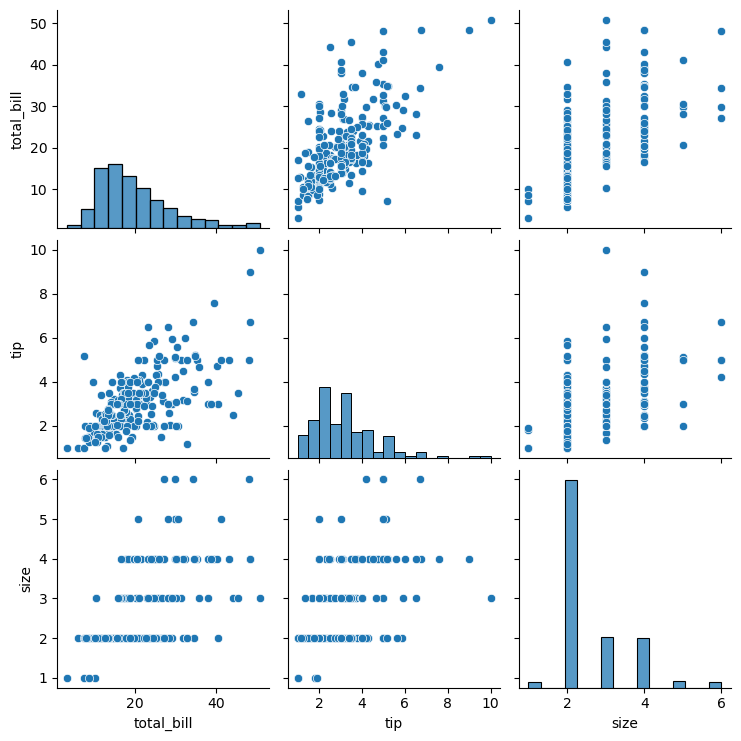

In [ ]:
sns.pairplot(tips)

### 4. Linear Regression and Relationship

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

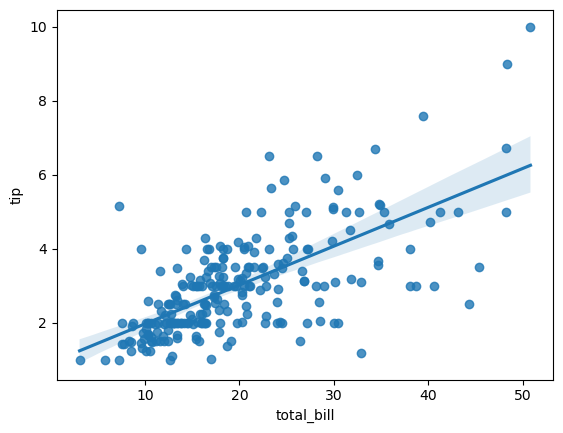

In [ ]:
sns.regplot(x='total_bill',y='tip',data=tips)        # Regression and linear model plot is almost the same

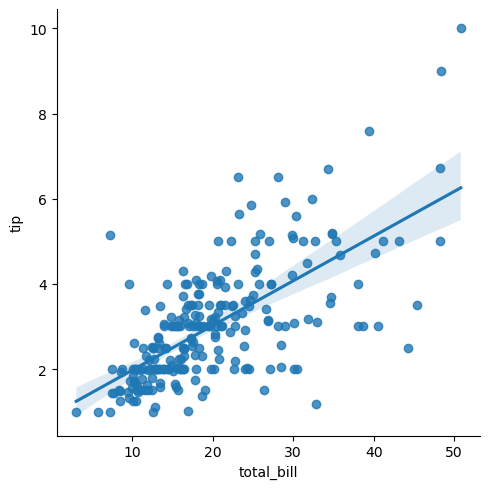

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips)     # or you can perform the same by using linear model plot

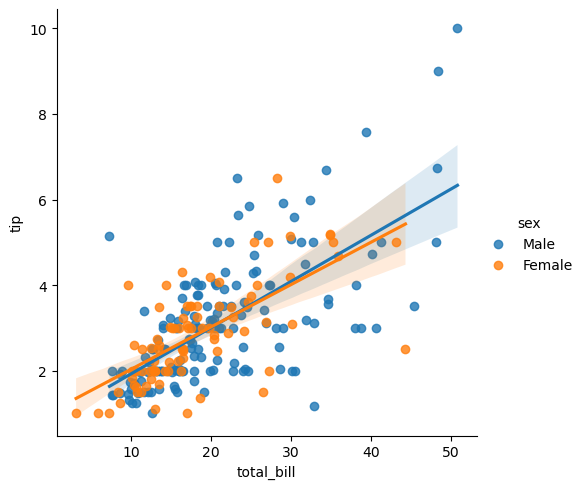

In [ ]:
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips)

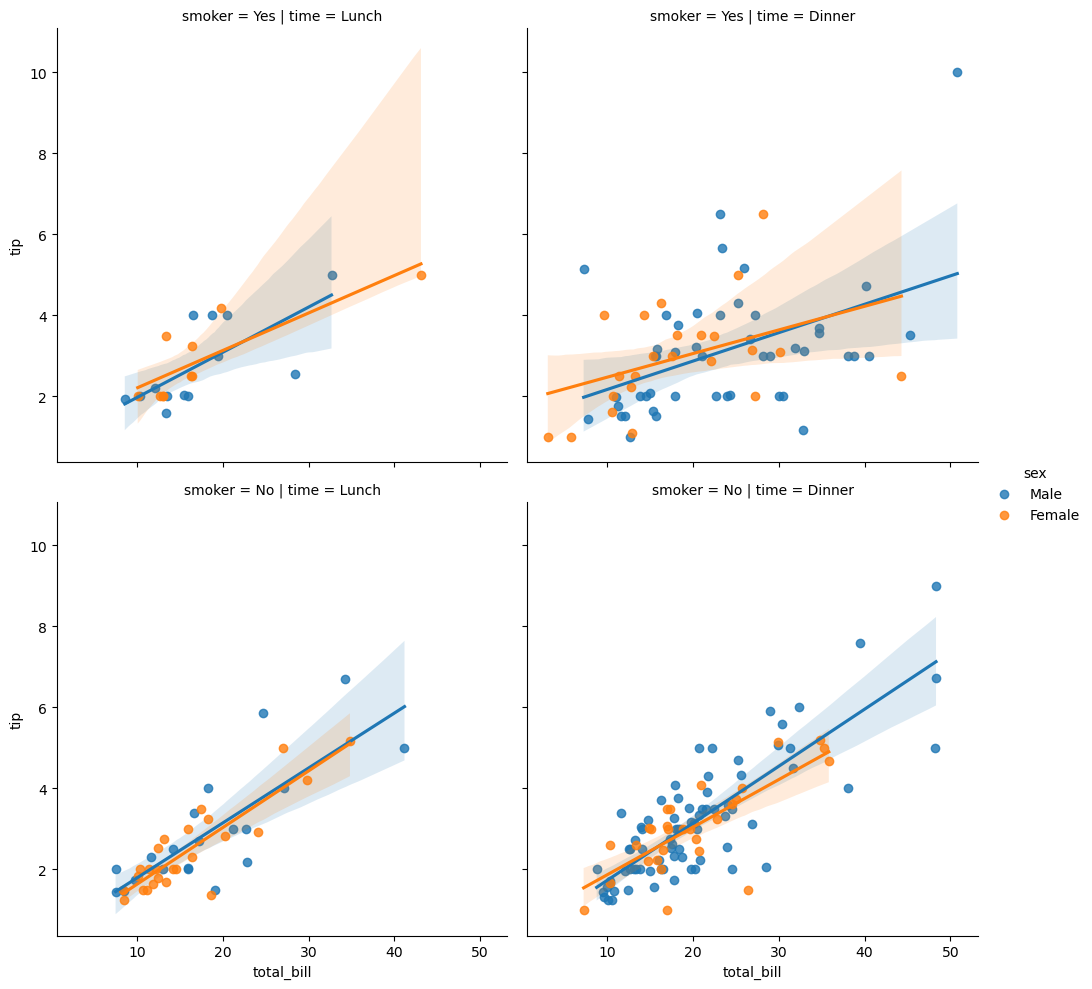

In [ ]:
sns.lmplot(x='total_bill',y='tip',hue='sex',col='time',row='smoker',data=tips)